In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_excel('air cargo supplychain.xlsx')
df

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019996,ATL,DXB,158.99,10.97,300.55,Air,UPS,36,Yes,Yes,32,Clear,Monday,Delayed
19996,SHIP019997,MIA,NRT,655.74,42.92,1239.58,Air,FedEx,46,Yes,No,28,Foggy,Friday,On-Time
19997,SHIP019998,LAX,LHR,711.80,29.54,1345.55,Air,UPS,30,Yes,No,16,Clear,Monday,On-Time
19998,SHIP019999,DFW,HKG,147.04,4.38,277.96,Rail,FedEx,16,No,No,19,Clear,Thursday,On-Time


In [16]:
categorical_columns = ['Origin Airport', 'Destination Airport', 'Mode of Transport', 'Carrier Name', 
                       'Temperature-Sensitive', 'Perishable Goods', 'Weather Conditions', 'Day of Week']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df

,Shipment ID,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Transit Time (hours),Customs Clearance Time (hours),Delay Status,Origin Airport_DFW,Origin Airport_JFK,Origin Airport_LAX,...,Perishable Goods_Yes,Weather Conditions_Foggy,Weather Conditions_Rainy,Weather Conditions_Stormy,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,SHIP000001,655.03,7.80,1238.23,16,7,Delayed,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,SHIP000002,988.60,37.41,1868.80,21,5,On-Time,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,SHIP000003,637.71,10.53,1205.49,6,36,On-Time,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,SHIP000004,367.47,7.70,694.65,17,16,On-Time,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,SHIP000005,671.23,3.59,1268.86,36,3,Delayed,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019996,158.99,10.97,300.55,36,32,Delayed,False,False,False,...,True,False,False,False,True,False,False,False,False,False
19996,SHIP019997,655.74,42.92,1239.58,46,28,On-Time,False,False,False,...,False,True,False,False,False,False,False,False,False,False
19997,SHIP019998,711.80,29.54,1345.55,30,16,On-Time,False,False,True,...,False,False,False,False,True,False,False,False,False,False
19998,SHIP019999,147.04,4.38,277.96,16,19,On-Time,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [17]:
df['Delay Status'] = df['Delay Status'].map({'Delayed': 1, 'On-Time': 0})

In [18]:
df.drop(columns=['Shipment ID'], inplace=True)

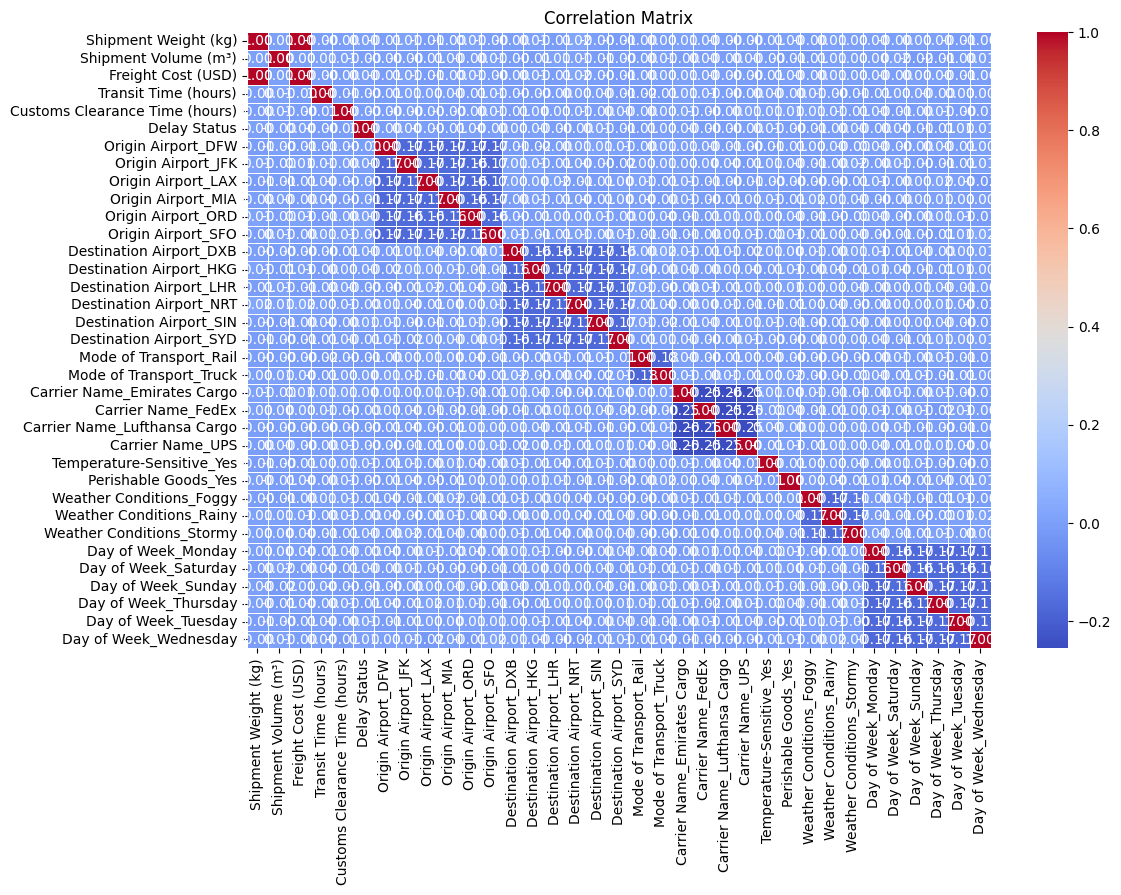

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
X = df.drop(columns=['Delay Status'])
y = df['Delay Status']

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [23]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.5003


In [24]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.5039


In [25]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.5031


In [26]:
ada_clf = AdaBoostClassifier(n_estimators=200, learning_rate=0.8, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost Classifier Accuracy: 0.5033
